In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'


In [3]:
end = dt.datetime.now()
start = dt.datetime(2018,1,1)
df = pdr.get_data_yahoo('CBA.AX', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,80.330002,79.779999,80.300003,80.220001,1284609.0,63.932739
2018-01-02,80.644997,80.059998,80.470001,80.139999,1349269.0,63.868980
2018-01-03,80.480003,79.809998,80.480003,79.970001,1596303.0,63.733509
2018-01-04,81.250000,80.370003,80.540001,81.160004,2208531.0,64.681892
2018-01-07,81.750000,81.300003,81.400002,81.620003,1293549.0,65.048500


Simple return

Rt = Pt-P_t-1 / P_t-1 

    

In [5]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2018-01-02   -0.000997
2018-01-03   -0.002121
2018-01-04    0.014881
2018-01-07    0.005668
2018-01-08    0.006984
                ...   
2022-09-15    0.006352
2022-09-16   -0.008731
2022-09-19    0.004563
2022-09-20    0.019755
2022-09-21   -0.011188
Name: Close, Length: 1196, dtype: float64

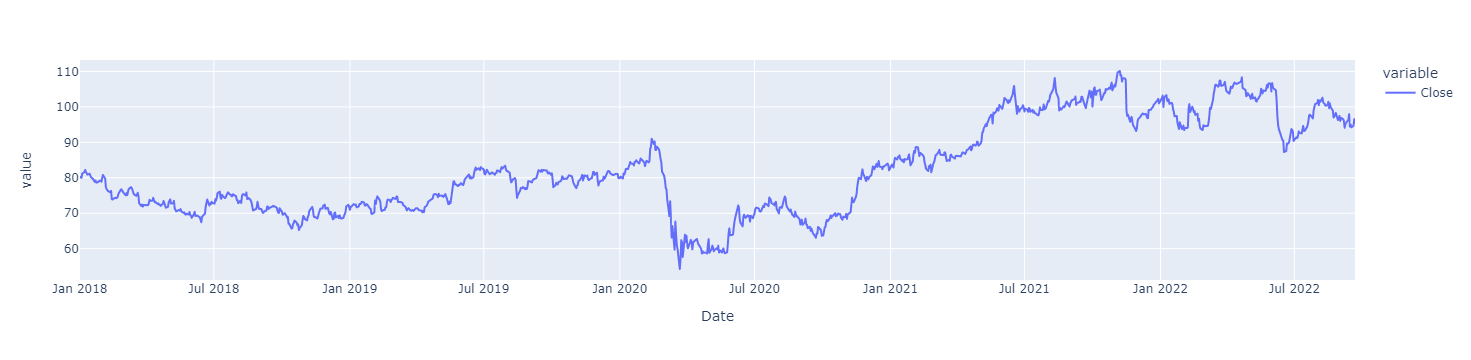

In [7]:
df.Close.plot().update_layout(autosize= False, width=500, height=300)

In [8]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 80.22000122070312 Last 95.44999694824219


In [9]:
simple_returns.mean()

0.0002681947769082662

In [10]:
df.Close[0] * (1+simple_returns.mean())**len(simple_returns)

110.55253338405666

In [11]:
df.Close[0]*np.prod([(1+ Rt) for Rt in simple_returns])

95.44999694824185

In [13]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns


Date
2018-01-02   -0.000998
2018-01-03   -0.002124
2018-01-04    0.014771
2018-01-07    0.005652
2018-01-08    0.006959
                ...   
2022-09-15    0.006332
2022-09-16   -0.008770
2022-09-19    0.004553
2022-09-20    0.019562
2022-09-21   -0.011251
Name: Close, Length: 1196, dtype: float64

In [14]:
log_returns.mean()

0.00014534251056905193

In [15]:
df.Close[0] * np.exp(log_returns.mean()*len(log_returns))

95.44999694824197

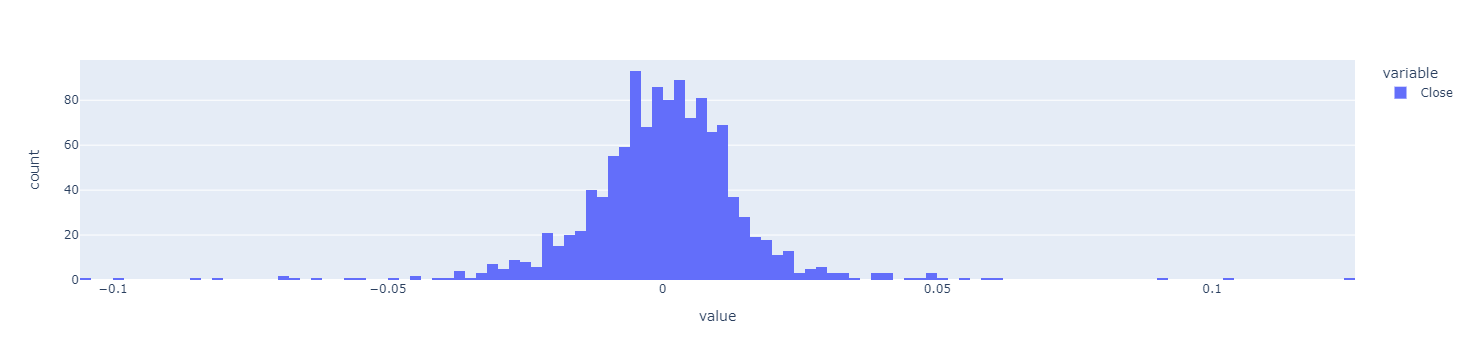

In [16]:
log_returns.plot(kind='hist')

In [22]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()

In [24]:
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]


In [25]:
std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()

In [26]:
print(std_worst, std_best)

-6.73278914687773 7.9326536914071495


In [31]:
print('Probability worst %.15f Best %.15f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Probability worst 0.000000000057217 Best 0.000000000000009


Q0Q or quantile-quantile plots


Q-Q plot


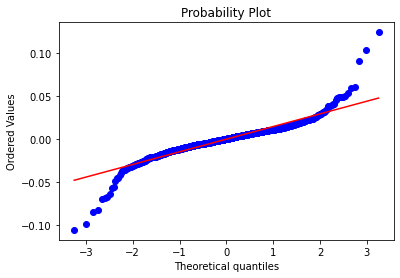

In [32]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q plot')

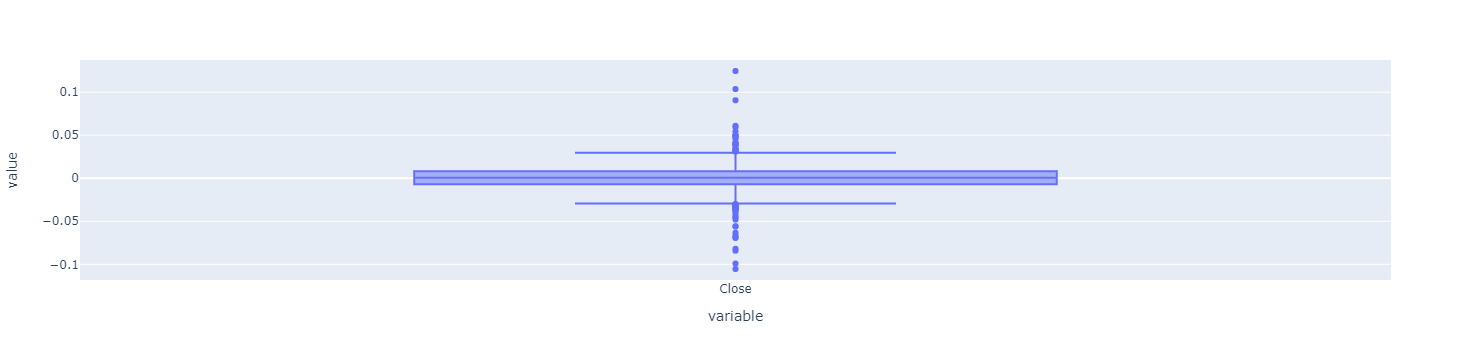

In [38]:
log_returns.plot(kind='box')

In [39]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)

if p_value > 0.05:
    print("probably gaussian")
else:
    print('probably not Gaussian')

0.47495871542992385 2.6461293587185155e-248
probably not Gaussian


In [40]:
sw_stat, p_value = stats.shapiro(log_returns)
print(sw_stat, p_value)
if p_value > 0.05:
    print("probably gaussian")
else:
    print('probably not Gaussian')


0.8819173574447632 3.2543070216074126e-29
probably not Gaussian
